# <center> MATH&ML-8. Алгоритмы на основе деревьев решений

In [1026]:
# Импорты
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree

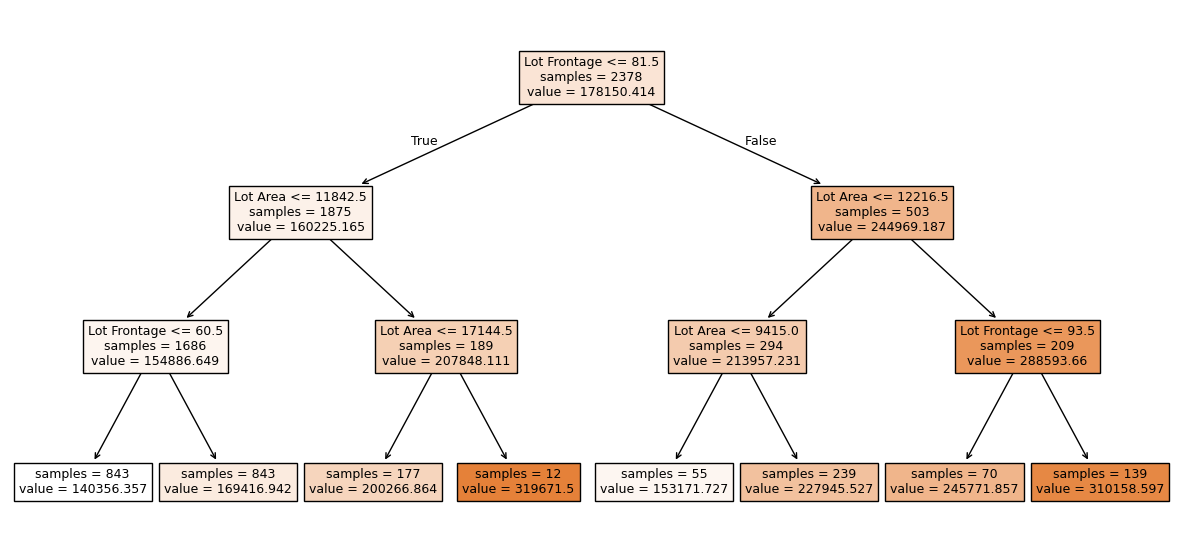

In [1027]:
# Создаём обучающую выборку
ames_data = pd.read_csv('data/AmesHousing.zip')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
X = ames_data[['Lot Frontage', 'Lot Area']]
y = ames_data['SalePrice']

# Инициализируем модель дерева решений с максимальной глубиной 3 и обучаем её
dt_reg = tree.DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X.values, y)

# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_reg, #дерево решений 
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

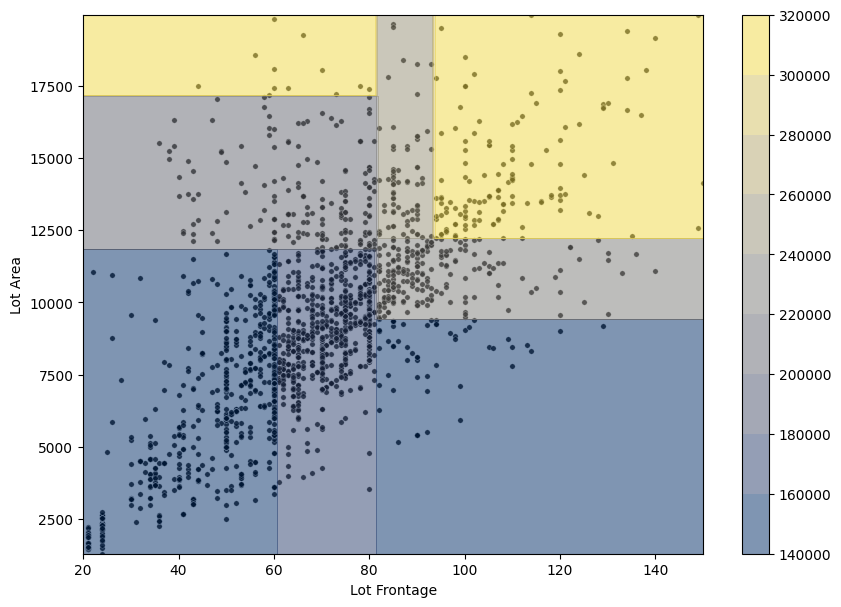

In [1028]:
def plot_decision_bound_regression(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    y_pred = model.predict(X_net)
    y_pred = y_pred.reshape(xx1.shape)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], s=15, color='black', alpha=0.8)
    contour = plt.contourf(xx1, xx2, y_pred, 10, cmap='cividis', alpha=0.5)
    fig.colorbar(contour)

# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_regression(X, y, dt_reg, fig)

In [1029]:
# Создаём обучающую выборку    
bill_data = pd.read_csv('data/bill_authentication.zip')
X = bill_data[['Variance', 'Skewness']]
y = bill_data['Class']
bill_data

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


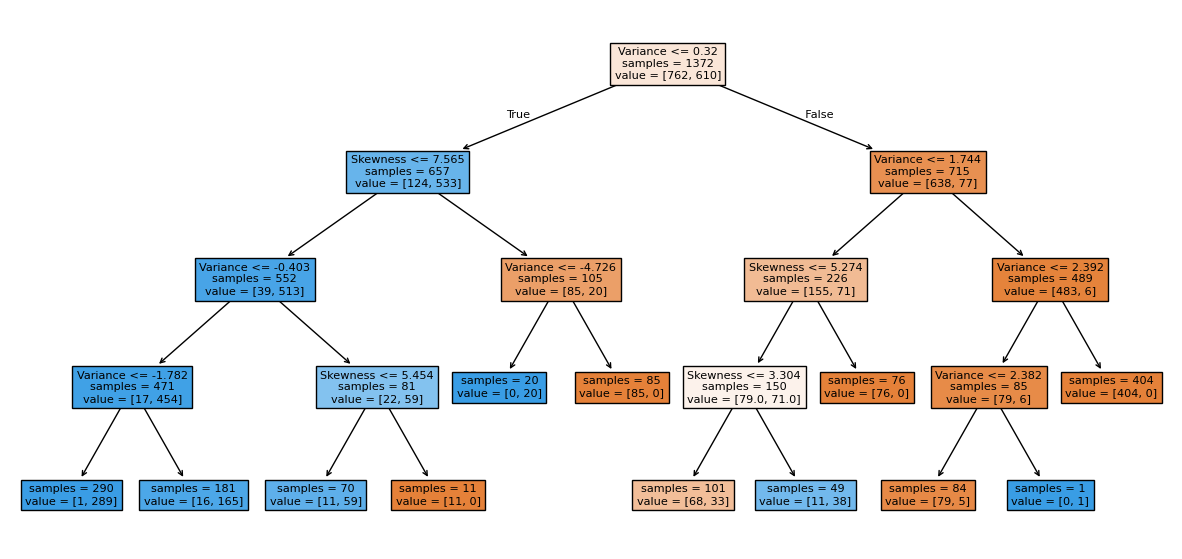

In [1030]:
# Инициализируем модель дерева решений с максимальной глубиной 4 и обучаем её
dt_clf = tree.DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X.values, y)

# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_clf, #дерево решений
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

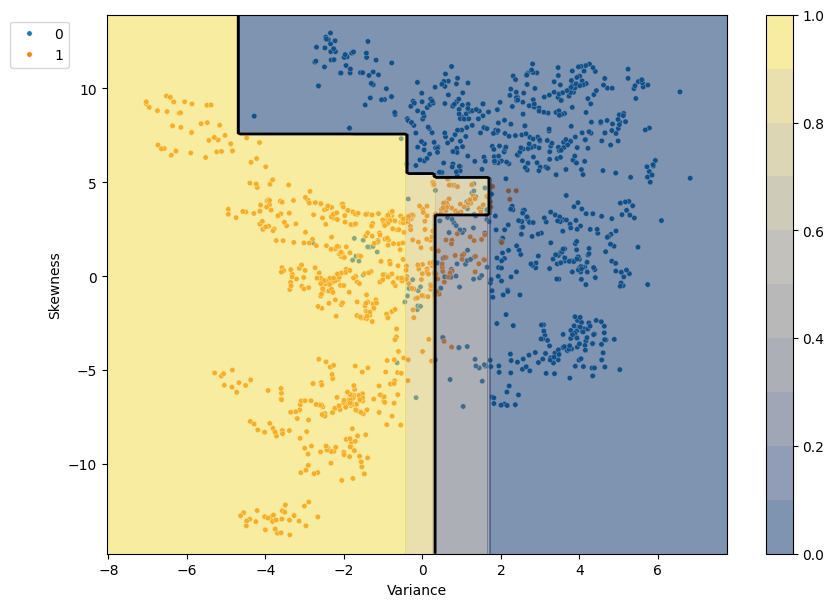

In [1031]:
def plot_decision_bound_classification(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    probs = model.predict_proba(X_net)[:, 1]
    probs = probs.reshape(xx1.shape)
    
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, s=15, alpha=1)
    contour = plt.contourf(xx1, xx2, probs, 10, cmap='cividis', alpha=0.5)
    bound = plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    fig.colorbar(contour)
    plt.legend(bbox_to_anchor=(-0.05, 1))
# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_classification(X, y, dt_clf, fig)

### Юнит 3. Алгоритм CART: параметры разбиения

In [1032]:
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
x = data['age']
y = data['loan']

x = x.sort_values().drop_duplicates()
print(x.values)

x_roll_mean = x.rolling(2).mean()
print(x_roll_mean.values)

x_roll_mean = x_roll_mean.dropna()
print(x_roll_mean.values)

y = y[x_roll_mean.index]
y_roll_mean = y.diff()
candidates = x_roll_mean[y_roll_mean != 0]
print(candidates)

[17 18 20 25 29 31 38 49 55 64]
[ nan 17.5 19.  22.5 27.  30.  34.5 43.5 52.  59.5]
[17.5 19.  22.5 27.  30.  34.5 43.5 52.  59.5]
2    17.5
3    19.0
7    22.5
9    30.0
4    34.5
5    43.5
Name: age, dtype: float64


In [1033]:
def find_candidates_for_thresholds(x, y):
    x = x.sort_values().drop_duplicates()
    x_roll_mean = x.rolling(2).mean().dropna()
    y = y[x_roll_mean.index]
    y_roll_mean = y.diff()
    candidates = x_roll_mean[y_roll_mean != 0]
    return candidates.values

#Проверка
print(find_candidates_for_thresholds(data['age'], data['loan']))
print(find_candidates_for_thresholds(data['income'], data['loan']))

[17.5 19.  22.5 30.  34.5 43.5]
[23.5 34.5 36.5 48.  64.5 72. ]


In [1034]:
# Задание 3.4

ames_data = pd.read_csv('data/AmesHousing.zip')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
ames_sample = ames_data[['Lot Frontage', 'Lot Area', 'SalePrice']].sample(
    n=15, #количество объектов
    random_state=42, #генератор случайных чисел
    ignore_index=True #сбрасываем счетчик индекса
)
x1 = ames_sample['Lot Frontage']
y = ames_sample['SalePrice']
print(find_candidates_for_thresholds(x1, y))

[ 53.  58.  61.  65.  69.  71.  76.  86.  94. 101.]


In [1035]:
# Задание 3.5
# Недостающая часть из задания 3.4

x2 = ames_sample['Lot Area']
print(find_candidates_for_thresholds(x2, y))

[ 5508.   7153.   7425.   7949.   8405.5  8526.5  8850.   9137.5  9466.
 10051.5 10507.  10834.  11365.  12288. ]


### Алгоритм CART: неоднородность, критерии информативности

In [1036]:
def squared_error(y):
    # Функция для расчёта MSE
    y_pred = y.mean()
    return ((y - y_pred) ** 2).mean()

def split(X, y, split_params):
    # разбивает выборку (X, y) по предикату [xj <= t] с параметрами
    # разделения (split_params) на левую и правую части:
    j, t = split_params
    predicat = X.iloc[:, j] <= t
    X_left, y_left = X[predicat], y[predicat]
    X_right, y_right = X[~predicat], y[~predicat]
    return X_left, y_left, X_right, y_right

def calculate_weighted_impurity(X, y, split_params, criterion):
    
    """Функция для рассчета взвешенной неоднородности после разбиения

    Args:
        X (DataFrame, np.array): Обучающая выборка
        y (DataFrame, Series, np.array): Целевой признак
        split_params (tuple): Параметры разбиения
        criterion (func): Функция, по которой рассчитывается критерий 
        информативности

    Returns:
        float: счет взвешенной неоднородности
    """    
    
    X_left, y_left, X_right, y_right = split(X, y, split_params)
    N, N_left, N_right  = y.size, y_left.size, y_right.size
    score = N_left / N * criterion(y_left) + N_right / N * criterion(y_right)
    return score

def best_split(X, y, criterion):
    
    """Функция для построения решающего пня

    Args:
        X (DataFrame, np.array): Обучающая выборка
        y (DataFrame, Series, np.array): Целевой признак
        criterion (func): Функция, по которой рассчитывается критерий 
        информативности
        
    Returns:
        tuple: Оптимальные параметры для построения решающего пня
    """
        
    M = X.shape[1]
    min_weighted_impurity = np.inf
    optimal_split_params = None
    for j in range(M):
        thresholds = find_candidates_for_thresholds(X.iloc[:, j], y)
        for t in thresholds:
            split_params = (j, t)
            weighted_impurity = calculate_weighted_impurity(X, y, split_params, criterion)
            if weighted_impurity < min_weighted_impurity:
                min_weighted_impurity = weighted_impurity
                optimal_split_params = split_params
    return optimal_split_params

In [1037]:
data = pd.DataFrame({
    'x1': list(range(1, 16)),
    'y': [1, 1.2, 1.4, 1.1, 1, 5.5, 6.1, 6.7, 6.4, 6, 6, 3, 3.2, 3.1, 3]
})
X = data[['x1']]
y = data['y']

# Находим оптимальные параметры разбиения
optimal_split_params = best_split(X, y, criterion=squared_error)
print('Optimal j: {}'.format(optimal_split_params[0]))
print('Optimal t: {}'.format(optimal_split_params[1]))

Optimal j: 0
Optimal t: 5.5


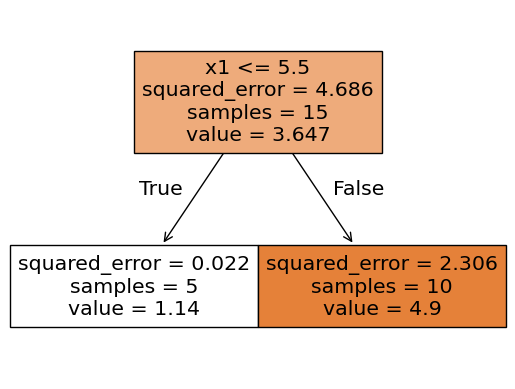

In [1038]:
#Для сравнения

# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем её
dt = tree.DecisionTreeRegressor(
    max_depth=1, #глубина
    criterion='squared_error', #критерий информативности
    random_state=0 #генератор случайных чисел
)

dt.fit(X, y)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=list(X.columns), #названия факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

Optimal j: 0
Optimal t: 71.0


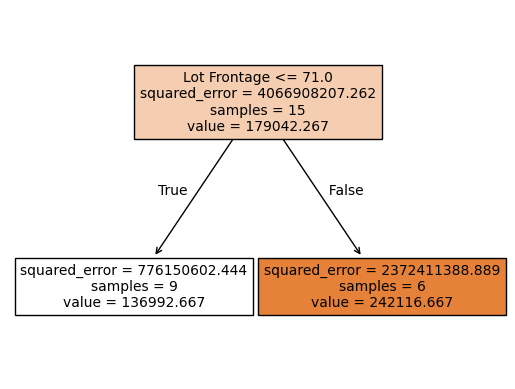

In [1039]:
# Задание 4.3
ames_data = ames_data[(ames_data["Lot Frontage"] <=150) & (ames_data["Lot Area"] <=20000)]

ames_sample = ames_data[["Lot Frontage", "Lot Area", "SalePrice"]].sample(
    n=15, random_state=42, ignore_index=True
)

X = ames_sample[["Lot Frontage", "Lot Area"]]
y = ames_sample["SalePrice"]

optimal_split_params = best_split(X, y, criterion=squared_error)
print('Optimal j: {}'.format(optimal_split_params[0]))
print('Optimal t: {}'.format(optimal_split_params[1]))

#Для проверки
dt = tree.DecisionTreeRegressor(
    max_depth=1, #глубина
    criterion='squared_error', #критерий информативности
    random_state=0 #генератор случайных чисел
)

dt.fit(X, y)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=list(X.columns), #названия факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

In [1040]:
# Для реализации поиска неоднородности при классификации добавим 
# функцию энтропии, остальной алгоритм тот же

def entropy(y):
    p = y.value_counts(normalize=True)
    entropy = -np.sum(p * np.log2(p))
    return entropy

In [1041]:
# Пример вызова, значения не имеют смысла
optimal_params = best_split(X, y, criterion=entropy)
print(optimal_params)

(0, 65.0)


(1, 3.22085)
Взвешенная неоднородность: 0.46


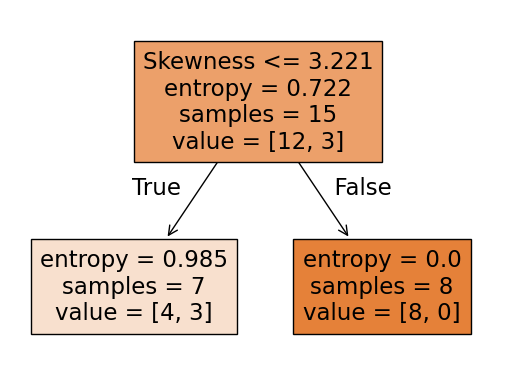

In [1042]:
# Задание 4.5

bill_data = pd.read_csv('data/bill_authentication.zip')
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15, 
    random_state=42, 
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

optimal_params = best_split(X, y, criterion=entropy)
print(optimal_params)

#Для проверки
dt = tree.DecisionTreeClassifier(
    max_depth=1, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)

dt.fit(X, y)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=list(X.columns), #названия факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

print('Взвешенная неоднородность:', round((7/15)*0.985 + (0.0*8/15), 2))

### Алгоритм CART: рекурсия, критерии остановки

In [1043]:
class Node:
    def __init__(self, left=None, 
                 right=None, value=None, 
                 split_params=None, impurity=None,
                 samples=None, is_leaf=False):
        
        """Инициализация вспомогательного класса вершины

        Args:
            left (_type_, optional): ссылка на левого потомка. Defaults to None.
            right (_type_, optional): ссылка на правого потомка. Defaults to None.
            value (_type_, optional): ответ алгоритма. Defaults to None.
            split_params (_type_, optional): параметры разбиения (сплита). 
            Defaults to None.
            impurity (_type_, optional): неоднородность в вершине (пригодится 
            для расчёта важности признаков). Defaults to None.
            samples (_type_, optional): количество объектов, попавших в вершину. 
            Defaults to None.
            is_leaf (bool, optional): булева переменная, которая указывает, 
            является ли вершина листовой. Defaults to False.
        """        
        
        self.left = left
        self.right = right
        self.split_params = split_params
        self.value = value
        self.impurity = impurity
        self.samples = samples
        self.is_leaf = is_leaf
  
      
def create_leaf_prediction(y, mode='classif'):
    # Принимает на вход целевую переменную и возвращает моду для 
    # классификации, и среднее для регрессии. По умолчанию сознает
    # листья классификации
    if mode == 'classif':
        value = y.mode()[0]
        return value
    elif mode == 'regr':
        value = y.mean()
        return value
    else:
        print('Неправильный параметр')


def stopping_criterion(X, y, criterion):
    # Критерий остановки. Срабатывает при равенстве нулю критерия информативности
    return criterion(y) == 0


def build_decision_tree(X, y, criterion):
    
    """Функция для реализации рекурсивного построения дерева решений

    Args:
        X (DataFrame, Series, array): Обучающая выборка
        y (DataFrame, Series, array): Целевой признак
        criterion (float): критерий информативности

    Returns:
        str: Корневая вершина дерева и само дерево решений, ссылка 
        на предикаты в памяти
    """   
     
    if stopping_criterion(X, y, criterion):
        value = create_leaf_prediction(y)
        node = Node(
            value=value, 
            impurity=criterion(y), 
            samples=y.size,
            is_leaf=True
        )
    else:
        split_params = best_split(X, y, criterion=criterion)
        X_left, y_left, X_right, y_right = split(X, y, split_params)
        left = build_decision_tree(X_left, y_left, criterion)
        right = build_decision_tree(X_right, y_right, criterion)       
        node = Node(
            left=left, right=right, 
            split_params=split_params, 
            impurity=criterion(y), 
            samples=y.size
        )
    
    return node


def print_decision_tree(node, depth=0):
    
    """Функция для вывода рекурсива получившегося дерева решений

    Args:
        node (class): Рекурсив дерева решений
        depth (int, optional): Требуемая глубина построения вывода. 
        Defaults to 0.
    """    
    
    depth += 1
    if node.is_leaf:
        print('   ' * depth, 'class: {}'.format(node.value))
    else:
        print('   ' * depth, 'feature_{} <= {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.left, depth=depth)
        print('   ' * depth, 'feature_{} > {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.right, depth=depth)


def predict_sample(node, x):
    
    """Функция для получения предсказания. Берёт вершину и объект 
    из выборки Х, рекурсивно передвигается по дереву на основе 
    характеристик объекта по условиям. Когда доходит до листа, 
    возвращает предсказание, присвоенное листу

    Args:
        node (Class.node): рекурсив дерева решений
        x (DataFrame, Series, array, list): объект обучающей выборки 
        (или объекты)

    Returns:
        float: Предсказанный класс или число
    """    
    
    if node.is_leaf:
        return node.value
    j, t = node.split_params
    if x[j] <= t:
        return predict_sample(node.left, x)
    else:
        return predict_sample(node.right, x)
    

def predict(decision_tree, X):
    #Вызывает функцию предсказания и собирает в кучу предсказанные 
    #значения, возвращая список
    predictions = [predict_sample(decision_tree, x) for x in X.values]
    return np.array(predictions)

# Объявляем функцию для вычисления энтропии
def entropy(y):
    p = y.value_counts(normalize=True)
    entropy = -np.sum(p * np.log2(p))
    return entropy

# Функция для вычисления среднеквадратичной ошибки
def squared_error(y):
    y_pred = y.mean()
    return ((y - y_pred) ** 2).mean()

In [1044]:
# Игрушечный пример

# Создаём обучающую выборку
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
X = data[['age', 'income']]
y = data['loan']

# Строим дерево решений и выводим его на экран
decision_tree = build_decision_tree(X, y, criterion=entropy)
print_decision_tree(decision_tree)

    feature_0 <= 43.500:
       feature_1 <= 86.000:
          feature_0 <= 22.500:
             feature_0 <= 19.000:
                class: 1
             feature_0 > 19.000:
                class: 0
          feature_0 > 22.500:
             class: 1
       feature_1 > 86.000:
          class: 0
    feature_0 > 43.500:
       class: 0


In [1045]:
# для сравнения
# Создаём модель дерева решений
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=1000 #генератор случайных чисел
)
dt.fit(X, y)
# Выводим дерево решений на экран в виде списка условий
print(tree.export_text(decision_tree=dt))

|--- feature_0 <= 43.50
|   |--- feature_1 <= 86.00
|   |   |--- feature_0 <= 22.50
|   |   |   |--- feature_0 <= 19.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  19.00
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  22.50
|   |   |   |--- class: 1
|   |--- feature_1 >  86.00
|   |   |--- class: 0
|--- feature_0 >  43.50
|   |--- class: 0



In [1046]:
# Пример предсказания
# Предсказываем целевую переменную
y_pred = predict(decision_tree, X)
print('Predictions: {}'.format(y_pred))

Predictions: [1 0 1 0 1 0 0 1 1 0]


In [1047]:
# задание 5.3

bill_data = pd.read_csv('data/bill_authentication.zip')
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15,
    random_state=42, 
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

decision_tree53 = build_decision_tree(X, y, criterion=entropy)
print_decision_tree(decision_tree53)

    feature_1 <= 3.221:
       feature_0 <= 2.756:
          feature_0 <= -1.254:
             class: 0
          feature_0 > -1.254:
             feature_0 <= -0.063:
                class: 1
             feature_0 > -0.063:
                feature_0 <= 0.988:
                   class: 0
                feature_0 > 0.988:
                   class: 1
       feature_0 > 2.756:
          class: 0
    feature_1 > 3.221:
       class: 0


In [1048]:
# для сравнения
# Создаём модель дерева решений
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=1000 #генератор случайных чисел
)
dt.fit(X, y)
# Выводим дерево решений на экран в виде списка условий
print(tree.export_text(decision_tree=dt))

|--- feature_1 <= 3.22
|   |--- feature_0 <= 2.76
|   |   |--- feature_0 <= -1.25
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -1.25
|   |   |   |--- feature_0 <= -0.06
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.06
|   |   |   |   |--- feature_0 <= 0.99
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  0.99
|   |   |   |   |   |--- class: 1
|   |--- feature_0 >  2.76
|   |   |--- class: 0
|--- feature_1 >  3.22
|   |--- class: 0



In [1049]:
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'y': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
# Создаём обучающую выборку
X = data[['age', 'income']]
y = data['y']

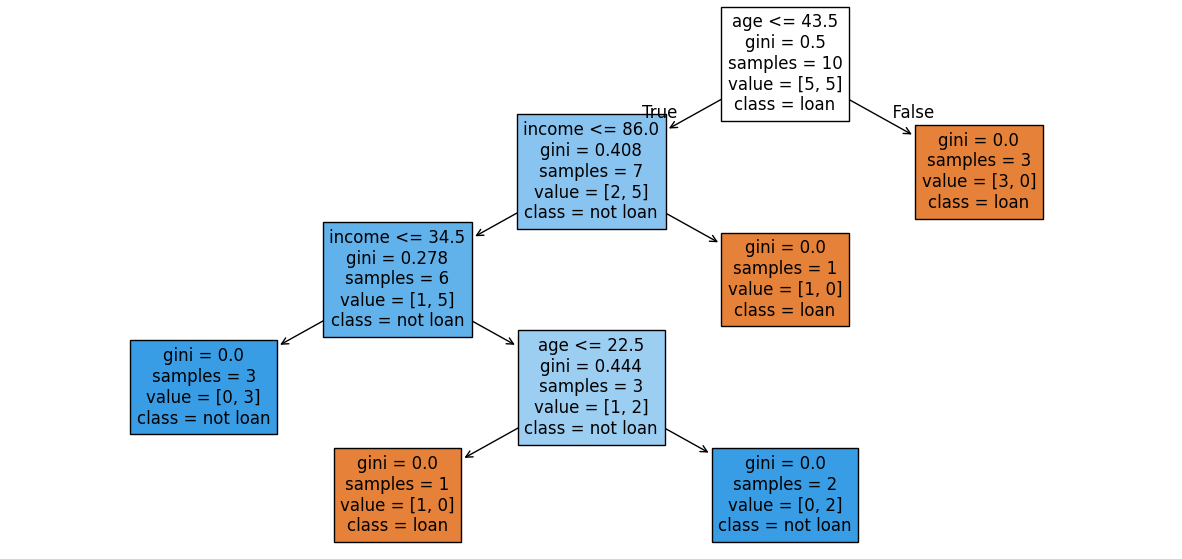

In [1050]:
# Критерий достижения однородности
dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

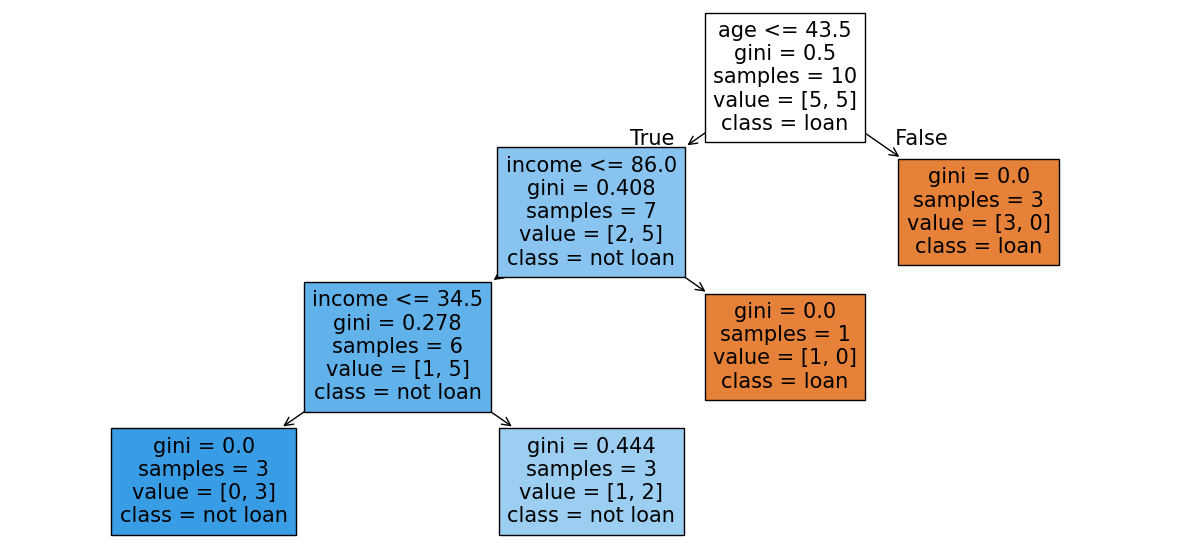

In [1051]:
# Ограничение максимальной глубины дерева

dt = tree.DecisionTreeClassifier(
    max_depth=3, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

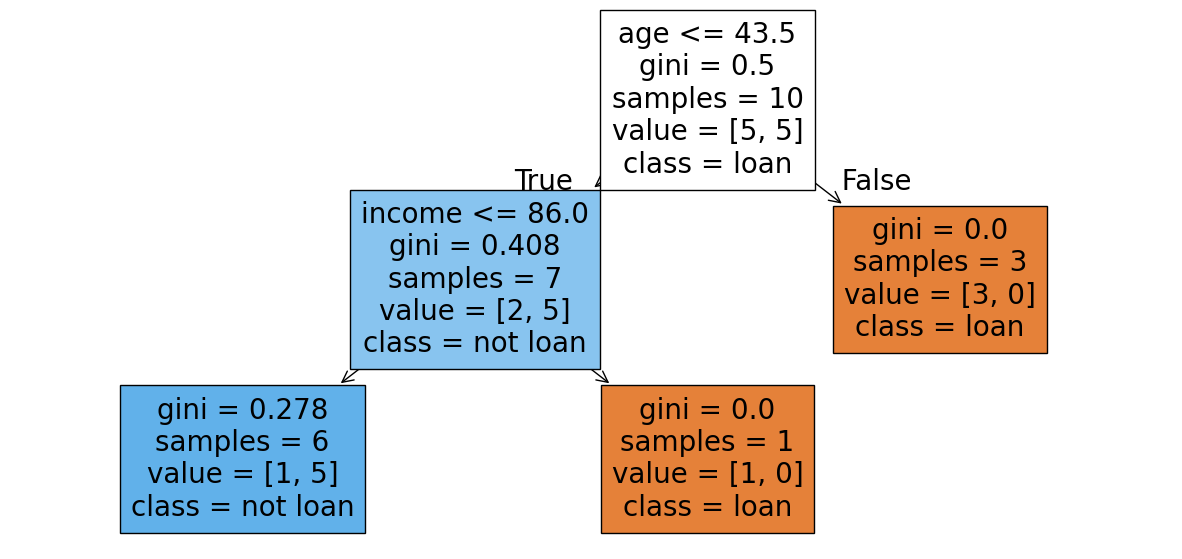

In [1052]:
# Ограничение максимального количества листьев в дереве

dt = tree.DecisionTreeClassifier(
    max_leaf_nodes=3, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

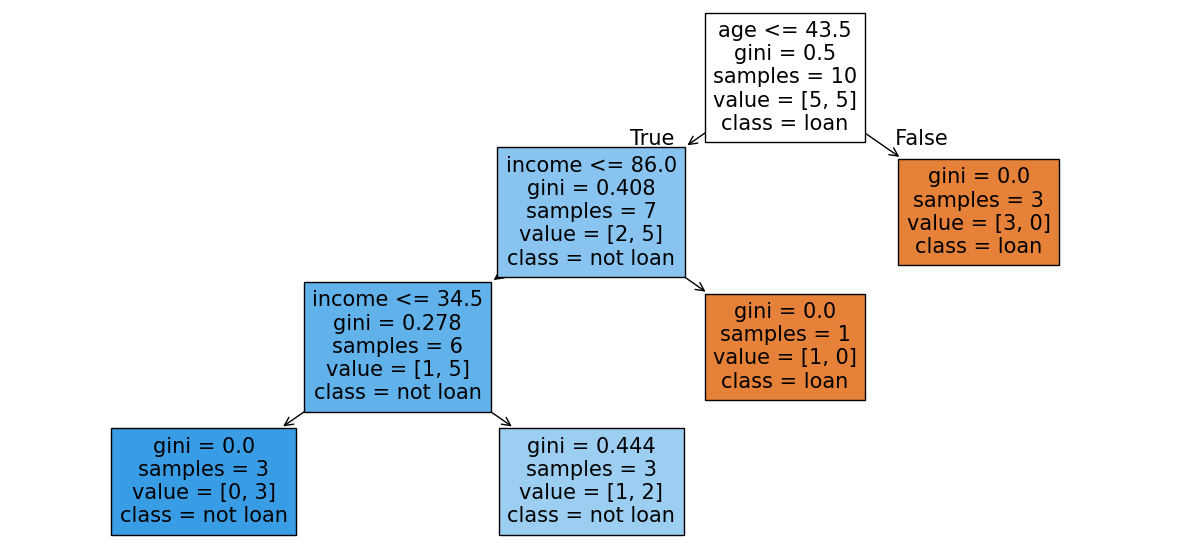

In [1053]:
# Ограничение на минимальное количество объектов, при которых допускается ветвление дерева

dt = tree.DecisionTreeClassifier(
    min_samples_split=6, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

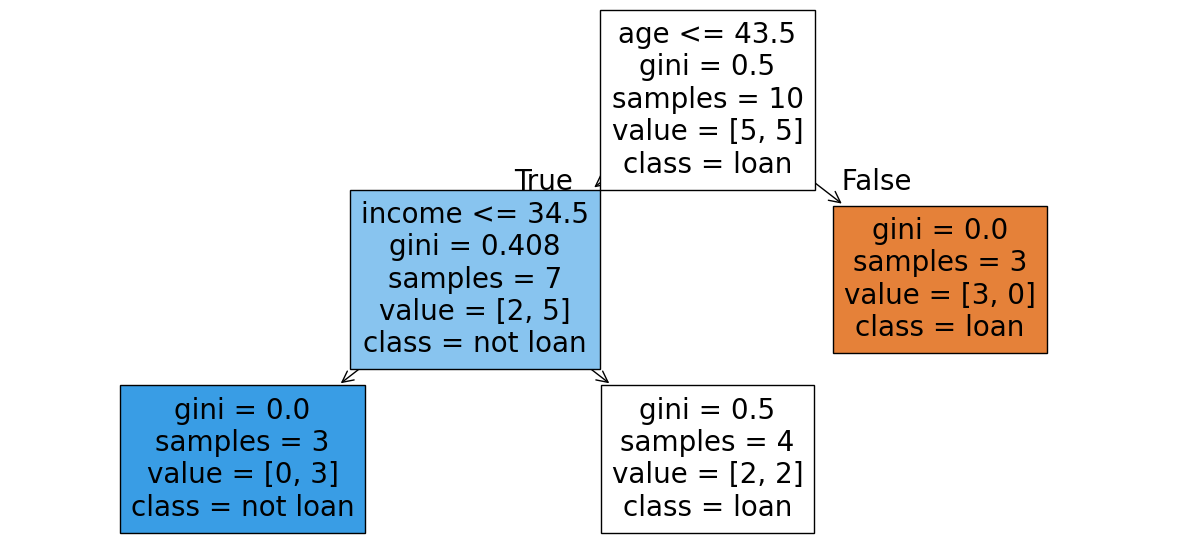

In [1054]:
# Ограничение на минимальное количество объектов, необходимых ля создания листа

dt = tree.DecisionTreeClassifier(
    min_samples_leaf=3, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

In [1055]:
# улучшенный алгоритм построения дерева решений (добавлены ограничения на максимальную глубину дерева)

def stopping_criterion(X, y, criterion, max_depth=None, depth=0):
    if max_depth is None:
        return (criterion(y) == 0) 
    else:
        return (criterion(y) == 0) or (depth > max_depth)
    
def build_decision_tree(X, y, criterion, max_depth=None, depth=0):
    depth += 1
    if stopping_criterion(X, y, criterion, max_depth, depth):
        value = create_leaf_prediction(y)
        node = Node(
            value=value, 
            impurity=criterion(y), 
            samples=y.size,
            is_leaf=True
        )
    else:
        split_params = best_split(X, y, criterion=entropy)
        X_left, y_left, X_right, y_right = split(X, y, split_params)
        left = build_decision_tree(X_left, y_left, criterion, max_depth, depth)
        right = build_decision_tree(X_right, y_right, criterion, max_depth, depth)       
        node = Node(
            left=left, right=right, 
            split_params=split_params, 
            impurity=criterion(y), 
            samples=y.size
        )
    return node

# Строим дерево решений с ограничением глубины и выводим его на экран
decision_tree = build_decision_tree(X, y, criterion=entropy, max_depth=2)
print_decision_tree(decision_tree)

    feature_0 <= 43.500:
       feature_1 <= 86.000:
          class: 1
       feature_1 > 86.000:
          class: 0
    feature_0 > 43.500:
       class: 0


### Юнит 6. Алгоритм CART: значимость признаков

In [1056]:
def calculate_feature_importances(node, feature_importance=None):
    """Функция для вычисления информативности каждого из 
    признаков для обученного дерева решений.

    Args:
        node (class.self): Обученное дерево решений
        feature_importance (array, optional): массив (список) 
        со всеми суммарными приростами по каждому из признаков. 
        Defaults to None.

    Returns:
        list: нормированный список со значением значимости признаков.
    """    
    if feature_importance is None:
        feature_importance = np.zeros(X.shape[1])
    if node.value is None:
        j = node.split_params[0]
        feature_importance[j] += node.impurity * node.samples - \
                                 node.left.impurity * node.left.samples - \
                                 node.right.impurity * node.right.samples
        calculate_feature_importances(node.left, feature_importance)
        calculate_feature_importances(node.right, feature_importance)
    feature_importance /= node.samples
    feature_importance /= feature_importance.sum()
    return feature_importance

In [1057]:
# Создаём обучающую выборку
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
X = data[['age', 'income']]
y = data['loan'] 
# Строим дерево решений и выводим его на экран
decision_tree = build_decision_tree(X, y, entropy)
# Вычисляем значения информативности признаков
print(calculate_feature_importances(decision_tree))

[0.78582905 0.21417095]


In [1058]:
# Для проверки
# Создаём модель дерева решений и обучаем её
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=1000 #генератор случайных чисел
)
dt.fit(X, y)
# Вычисляем значения информативности признаков
print(dt.feature_importances_)

[0.78582905 0.21417095]


In [1059]:
# Задание 6.3
a = ((320*0.462-227*0.273-93*0.256) + (93*0.256-18*0.444-75*0.191) + (189*0.071-62*0.2))/320
b = ((227*0.273-38*0.332-189*0.071) + (38*0.332-24*0.444) + (75*0.191-51*0.265))/320
c = (18*0.444-10*0.5-8*0.219)/320
print(a/(a+b+c))
print(a)

0.617803802252265
0.201784375


### Юнит 7. Деревья решений: практика

In [1060]:
# Импорты
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [1061]:
# Читаем датасет
voice_data = pd.read_csv('data/voice_gender.zip')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


meanfreq — средняя частота голоса спикера (в кГц);

sd — стандартное отклонение частоты (в кГц);

median — медианная частота (в кГц);

Q25 — первый квартиль частоты (25-я квантиль) (в кГц);

Q75 — третий квартиль частоты (75-я квантиль) (в кГц);

IQR — межквартильный размах (Q75-Q25) (в кГц);

skew — асимметрия распределения частот;

kurt — эксцесс распределения частот;

sp.ent — спектральная энтропия;

sfm — спектральная равномерность;

ode — модальная частота (наиболее популярная частота голоса);

centroid — частотный центроид;

peakf — пиковая частота (частота с наибольшей энергией);

meanfun — среднее значение основной частоты, измеренной по акустическому сигналу;

minfun — минимальное значение основной частоты, измеренной по акустическому сигналу;

maxfun — максимальное значение основной частоты, измеренной по акустическому сигналу;

meandom — среднее значение доминирующей частоты, измеренной по акустическому сигналу;

mindom — минимальное значение доминирующей частоты, измеренной по акустическому сигналу;

maxdom — максимальное значение доминирующей частоты, измеренной по акустическому сигналу;

dfrange — диапазон доминирующей частоты, измеренный по акустическому сигналу;

modindx — индекс модуляции;

label — целевой признак — метка класса: male (голос принадлежит мужчине) или female (голос принадлежит женщине).

In [1062]:
# общая информация
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [1063]:
# Пропуски
voice_data.isnull().sum().sum()

0

In [1064]:
# Формируем обучающую и тестовую выборки
X = voice_data.drop(['label'], axis=1)
y = voice_data['label']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


Выполнение условия корневой вершины в процентах: 51.1
accuracy: 0.956


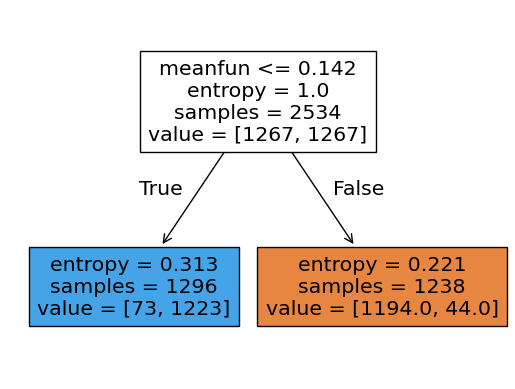

In [1065]:
#Задание 7.1
dt = tree.DecisionTreeClassifier(
    max_depth=1, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)

dt.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=list(X.columns), #названия факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

y_pred = dt.predict(X_test)
print('Выполнение условия корневой вершины в процентах:', round((1296/2534)*100, 1))
print('accuracy:', round(metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 3))

accuracy: 0.962


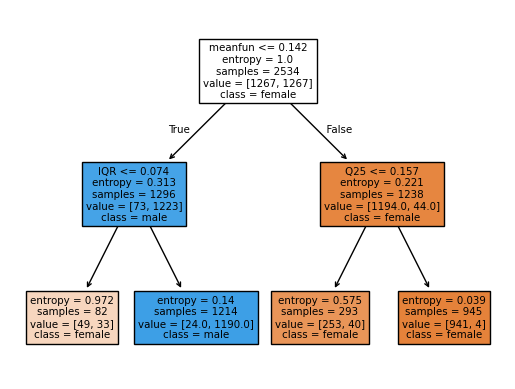

In [1066]:
# Задание 7.2
dt = tree.DecisionTreeClassifier(
    max_depth=2, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)

dt.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=list(X.columns), #названия факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
    class_names=dt.classes_ #Отображение названия классов дерева
);

y_pred = dt.predict(X_test)
# print('Выполнение условия корневой вершины в процентах:', round((1296/2534)*100, 1))
print('accuracy:', round(metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 3))

In [1067]:
# Задание 7.3
dt = tree.DecisionTreeClassifier(
    # max_depth=2, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)

dt.fit(X_train, y_train)

print('Глубина построенного дерева:', dt.get_depth())
print('Количество листьев в дереве:', dt.get_n_leaves())

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print('train_accuracy:', round(metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), 3))
print('test_accuracy:', round(metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), 3))

Глубина построенного дерева: 12
Количество листьев в дереве: 54
train_accuracy: 1.0
test_accuracy: 0.973


In [1068]:
# Задание 7.4

# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

# Параметры модели
grid_search_DT = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=0), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  

# Инициализация поиска
%time grid_search_DT.fit(X_train, y_train)
# print("accuracy на тестовом наборе: {:.2f}".format(grid_search_DT.score(X_train, y_train)))
y_pred_train = grid_search_DT.predict(X_train)
y_pred_test = grid_search_DT.predict(X_test)
print("Наилучшие значения гиперпараметров: {}".format(grid_search_DT.best_params_))
print('train_accuracy:', round(metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train), 3))
print('test_accuracy:', round(metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test), 3))

CPU times: total: 188 ms
Wall time: 544 ms
Наилучшие значения гиперпараметров: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}
train_accuracy: 0.996
test_accuracy: 0.97


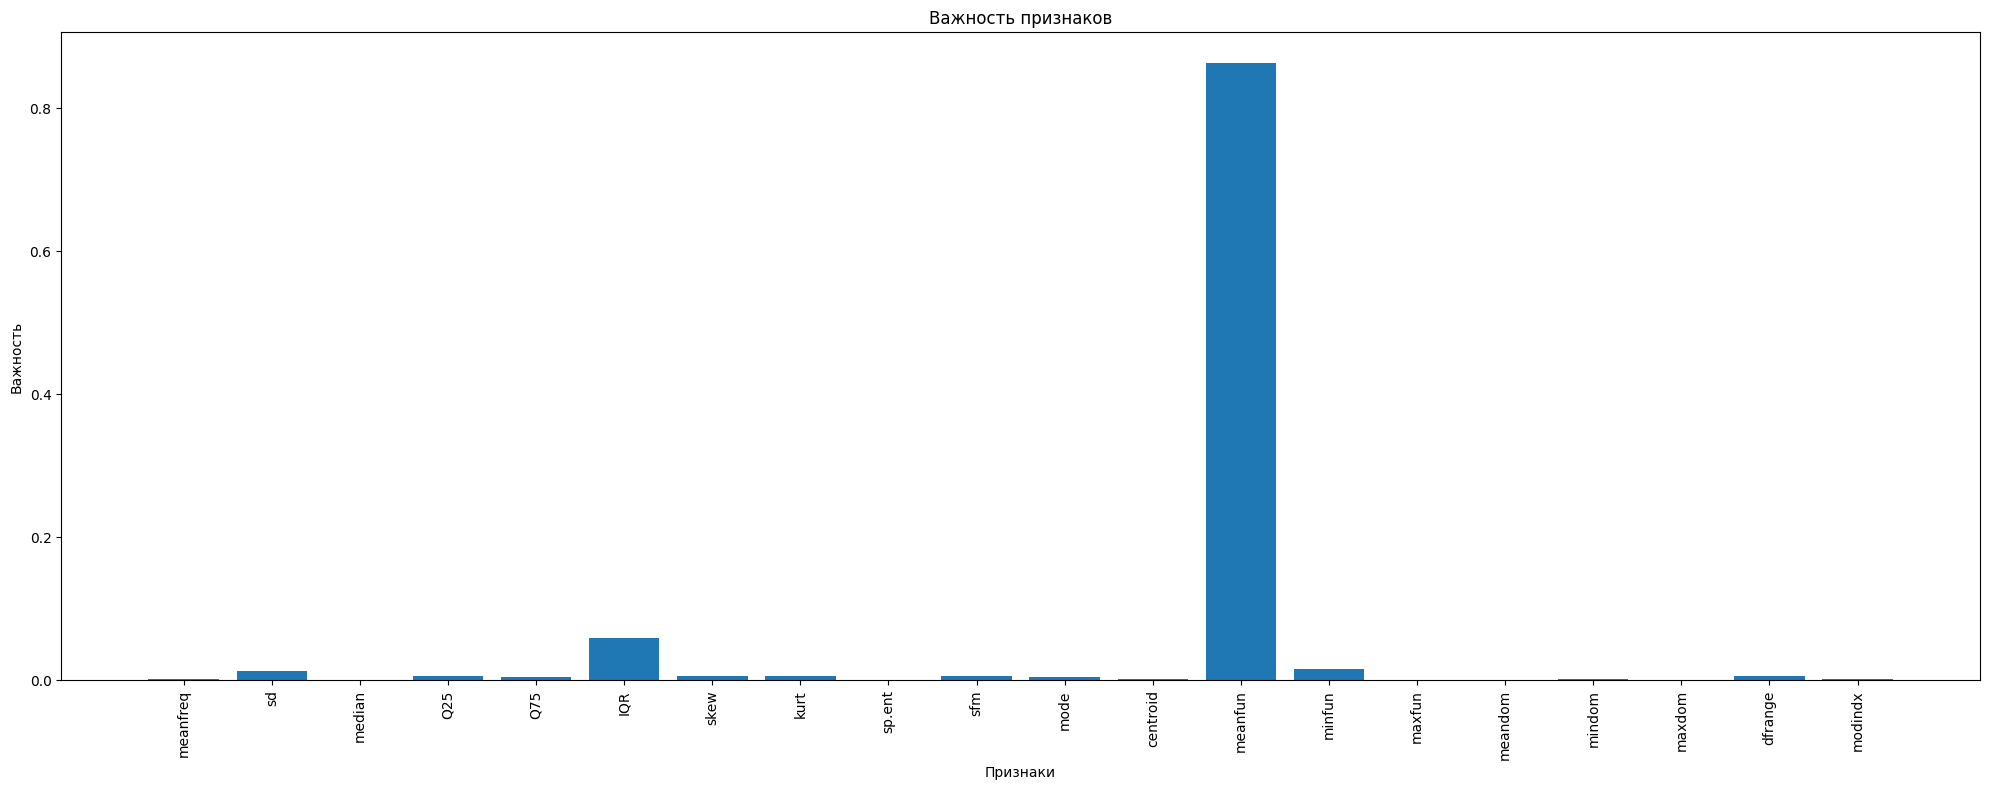

In [1069]:
# Задание 7.5

searched_dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=3)
searched_dt.fit(X_train, y_train)

dt_importances = searched_dt.feature_importances_
# indices = np.argsort(dt_importances)[::-1]
dt_importances

# Построение графиков
plt.figure(figsize=(20, 8))
plt.title("Важность признаков")
plt.bar(range(X_train.shape[1]), dt_importances, align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.tight_layout()

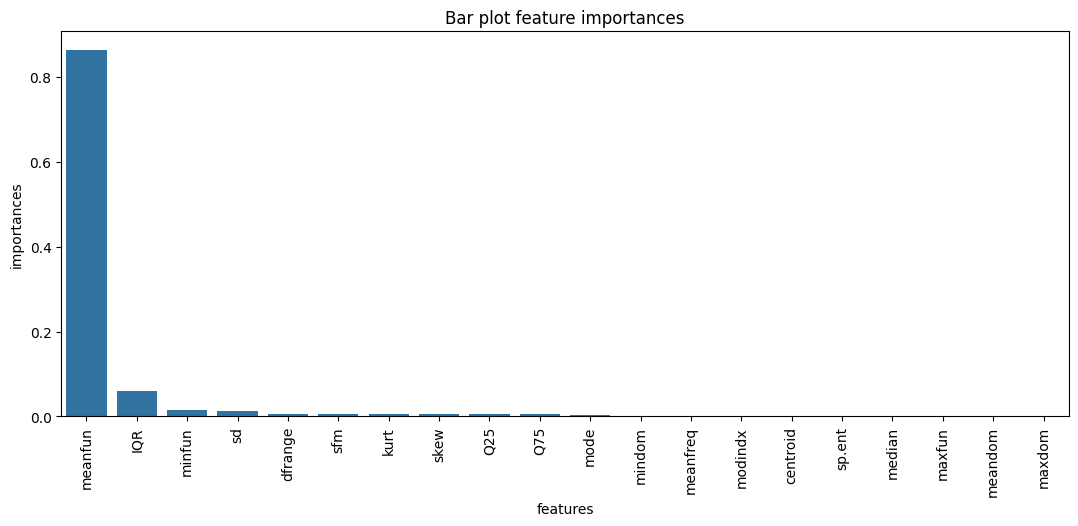

In [1070]:
# Эталонное решение
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
features = X.columns #признаки
feature_importances = searched_dt.feature_importances_ #важность признаков
# Создаём DataFrame, содержащий информацию о важности признаков
importances_data = pd.DataFrame({'features': features, 'importances': feature_importances})
importances_data = importances_data.sort_values(by='importances', ascending=False)
# Строим столбчатую диаграмму
sns.barplot(data=importances_data, x='features', y='importances', ax=ax);
# Добавляем подпись к графику и поворот меток на оси абсцисс
ax.set_title('Bar plot feature importances')
ax.xaxis.set_tick_params(rotation=90)